In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations 

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [68 lines of output]
      Traceback (most recent call last):
        File "C:\Users\kumar\Desktop\anaco\envs\cnn\Lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\kumar\Desktop\anaco\envs\cnn\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\kumar\Desktop\anaco\envs\cnn\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
        File "C:\Users\kumar\Desktop\anaco\envs\cnn\Lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
          marker = _parse_requirement_ma

In [2]:
!pip install opencv-python

In [3]:
import os,time,uuid,cv2

In [4]:
num_images=30

In [5]:
# cap=cv2.VideoCapture(0)
# for imgnum in range(num_images):
#     print('collecting image {}'.format(imgnum))
#     ret,frame=cap.read()
#     imgname=os.path.join('images',f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname,frame)
#     cv2.imshow('frame',frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF==ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [6]:
!pip install labelme


In [7]:
import tensorflow as tf
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt 

In [8]:
tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(2)

In [9]:
images=tf.data.Dataset.list_files('images\\*.jpg',shuffle=False)

In [10]:
images.as_numpy_iterator().next()

b'images\\55a84190-acea-11f0-9b4f-fbbed380158b.jpg'

In [11]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images=images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[22, 16,  0],
        [27, 21,  5],
        [28, 25,  8],
        ...,
        [ 0, 51, 19],
        [ 0, 51, 17],
        [ 0, 51, 17]],

       [[21, 15,  0],
        [27, 21,  5],
        [30, 27, 10],
        ...,
        [ 0, 49, 20],
        [ 0, 50, 19],
        [ 0, 50, 19]],

       [[21, 16,  0],
        [27, 22,  3],
        [31, 28, 11],
        ...,
        [ 2, 48, 22],
        [ 2, 48, 22],
        [ 3, 49, 23]],

       ...,

       [[ 4,  6,  3],
        [ 3,  5,  2],
        [ 2,  4,  1],
        ...,
        [17, 27, 16],
        [15, 25, 14],
        [13, 23, 12]],

       [[ 4,  6,  3],
        [ 4,  6,  3],
        [ 3,  5,  2],
        ...,
        [17, 29, 17],
        [14, 26, 14],
        [11, 23, 11]],

       [[ 5,  7,  4],
        [ 4,  6,  3],
        [ 4,  6,  3],
        ...,
        [17, 29, 17],
        [17, 29, 17],
        [16, 28, 16]]], shape=(480, 640, 3), dtype=uint8)

In [14]:
image_generator=images.batch(4).as_numpy_iterator()

In [15]:
plot_images=image_generator.next()

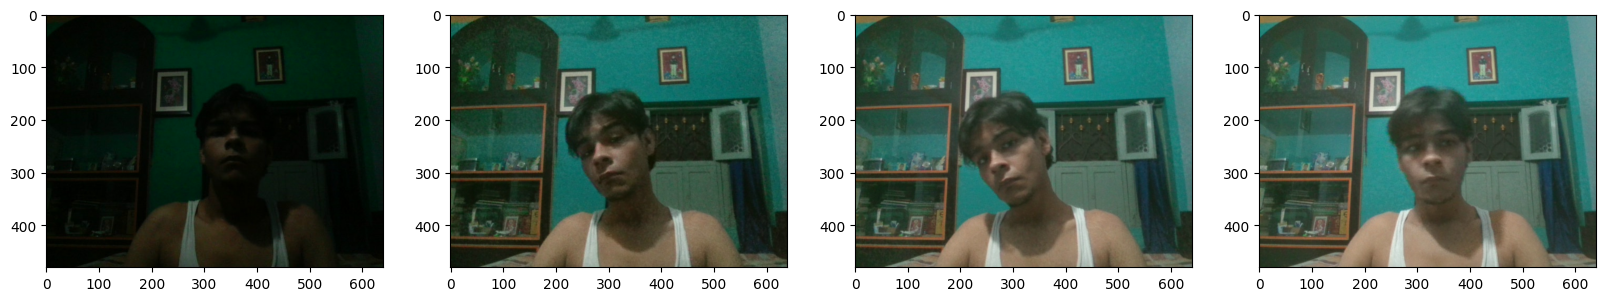

In [16]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [17]:
# os.makedirs(os.path.join('train','images'),exist_ok=True)
# os.makedirs(os.path.join('train','labels'),exist_ok=True)
# os.makedirs(os.path.join('test','images'),exist_ok=True)
# os.makedirs(os.path.join('test','labels'),exist_ok=True)
# os.makedirs(os.path.join('val','images'),exist_ok=True)
# os.makedirs(os.path.join('val','labels'),exist_ok=True)

In [18]:
# for folder in ['train','test','val']:
#     for file in os.listdir(os.path.join(folder,'images')):
#         filename=file.split('.')[0]+'.json'
#         existing_filepath=os.path.join('labels',filename)
#         if os.path.exists(existing_filepath):
#             new_filepath=os.path.join(folder,'labels',filename)
#             os.replace(existing_filepath,new_filepath)

In [19]:
import albumentations as alb

In [20]:
augmentor=alb.Compose([
    alb.RandomCrop(width=450,height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
],bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels']))

In [21]:
import cv2

In [22]:
img=cv2.imread(os.path.join('train','images','5a9f043d-acea-11f0-9047-fbbed380158b.jpg'))

In [23]:
with open(os.path.join('train','labels','5a9f043d-acea-11f0-9047-fbbed380158b.json'),'r') as f:
    labels=json.load(f)

In [24]:
labels

{'version': '5.9.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[259.72222222222223, 133.88888888888889],
    [468.0555555555556, 371.6666666666667]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\5a9f043d-acea-11f0-9047-fbbed380158b.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVY

In [25]:
labels['shapes'][0]['label']

'face'

In [26]:
labels['shapes'][0]['points']

[[259.72222222222223, 133.88888888888889],
 [468.0555555555556, 371.6666666666667]]

In [27]:
coords=[0,0,0,0]
coords[0]=labels['shapes'][0]['points'][0][0]
coords[1]=labels['shapes'][0]['points'][0][1]
coords[2]=labels['shapes'][0]['points'][1][0]
coords[3]=labels['shapes'][0]['points'][1][1]

In [28]:
coords

[259.72222222222223, 133.88888888888889, 468.0555555555556, 371.6666666666667]

In [29]:
coords=list(np.divide(coords,[640,480,640,480]))

In [30]:
augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [31]:
augmented

{'image': array([[[131, 135, 124],
         [131, 132, 122],
         [133, 133, 121],
         ...,
         [ 42,  57,  43],
         [ 42,  57,  43],
         [ 42,  58,  41]],
 
        [[132, 133, 123],
         [130, 131, 121],
         [132, 132, 120],
         ...,
         [ 41,  55,  43],
         [ 41,  56,  42],
         [ 42,  57,  43]],
 
        [[132, 133, 123],
         [130, 131, 121],
         [131, 131, 119],
         ...,
         [ 41,  55,  44],
         [ 42,  56,  44],
         [ 43,  57,  45]],
 
        ...,
 
        [[150, 149,  45],
         [151, 150,  46],
         [150, 151,  48],
         ...,
         [100, 133, 129],
         [ 97, 133, 127],
         [ 94, 130, 124]],
 
        [[147, 148,  45],
         [145, 146,  43],
         [143, 144,  41],
         ...,
         [ 90, 131, 140],
         [ 91, 132, 141],
         [ 91, 132, 141]],
 
        [[149, 150,  47],
         [147, 148,  45],
         [145, 146,  43],
         ...,
         [ 91, 135,

In [32]:
type(augmented)

dict

In [33]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [34]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

array([[[131, 135, 124],
        [131, 132, 122],
        [133, 133, 121],
        ...,
        [ 42,  57,  43],
        [ 42,  57,  43],
        [ 42,  58,  41]],

       [[132, 133, 123],
        [130, 131, 121],
        [132, 132, 120],
        ...,
        [ 41,  55,  43],
        [ 41,  56,  42],
        [ 42,  57,  43]],

       [[132, 133, 123],
        [130, 131, 121],
        [131, 131, 119],
        ...,
        [ 41,  55,  44],
        [ 42,  56,  44],
        [ 43,  57,  45]],

       ...,

       [[150, 149,  45],
        [151, 150,  46],
        [150, 151,  48],
        ...,
        [100, 133, 129],
        [ 97, 133, 127],
        [ 94, 130, 124]],

       [[147, 148,  45],
        [145, 146,  43],
        [143, 144,  41],
        ...,
        [ 90, 131, 140],
        [ 91, 132, 141],
        [ 91, 132, 141]],

       [[149, 150,  47],
        [147, 148,  45],
        [145, 146,  43],
        ...,
        [ 91, 135, 152],
        [ 88, 134, 151],
        [ 87, 133, 150]]

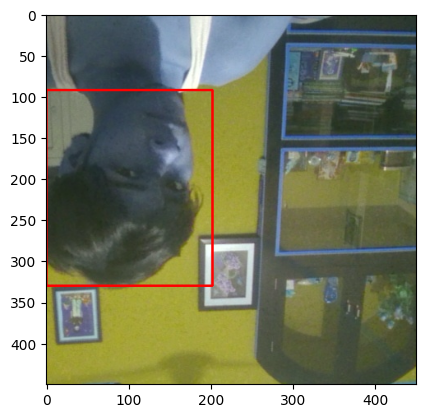

In [35]:
plt.imshow(augmented['image'])

In [36]:
# os.makedirs(os.path.join('aug_data','train','images'),exist_ok=True)
# os.makedirs(os.path.join('aug_data','test','images'),exist_ok=True)
# os.makedirs(os.path.join('aug_data','val','images'),exist_ok=True)
# os.makedirs(os.path.join('aug_data','train','labels'),exist_ok=True)
# os.makedirs(os.path.join('aug_data','test','labels'),exist_ok=True)
# os.makedirs(os.path.join('aug_data','val','labels'),exist_ok=True)


In [37]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join( partition, 'images')):
        img = cv2.imread(os.path.join(partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(30):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [38]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [39]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [40]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [41]:
train_images.as_numpy_iterator().next()

array([[[0.00398284, 0.10833333, 0.06372549],
        [0.        , 0.10422794, 0.05716912],
        [0.        , 0.10784314, 0.05784314],
        ...,
        [0.0759804 , 0.075     , 0.00165441],
        [0.08676471, 0.0776348 , 0.01305147],
        [0.08688726, 0.07659314, 0.01776961]],

       [[0.        , 0.10802696, 0.06060049],
        [0.00349265, 0.11329657, 0.05833333],
        [0.00042892, 0.11072304, 0.05055147],
        ...,
        [0.07696079, 0.08621324, 0.02996323],
        [0.0773897 , 0.08621324, 0.03131127],
        [0.0788603 , 0.08265931, 0.02855392]],

       [[0.        , 0.1091299 , 0.05765931],
        [0.        , 0.11415441, 0.05055147],
        [0.        , 0.11715686, 0.04656863],
        ...,
        [0.03719363, 0.06072304, 0.01966912],
        [0.05441177, 0.07794118, 0.03688725],
        [0.05631128, 0.08578432, 0.03560049]],

       ...,

       [[0.09117647, 0.06372549, 0.03235294],
        [0.10147059, 0.07401961, 0.03480392],
        [0.09362745, 0

In [ ]:
# def load_labels(label_path):
#     with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
#         label = json.load(f)
        
#     return [label['class']], label['bbox']

In [ ]:
# train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
# train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
# test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
# test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
# val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
# val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [84]:
def load_labels(label_path):
    # label_path is a tf.Tensor, convert to string
    label_path = label_path.numpy().decode('utf-8')
    with open(label_path, 'r', encoding="utf-8") as f:
        label = json.load(f)
    
    # Return as numpy arrays
    return np.array([label['class']], dtype=np.uint8), np.array(label['bbox'], dtype=np.float32)

# Wrapper for tf.py_function to set static shapes
def tf_load_labels(label_path):
    y_class, y_box = tf.py_function(load_labels, [label_path], [tf.uint8, tf.float32])
    
    # ⚡ Set static shapes so TF/Keras knows the dimensions
    y_class.set_shape([1])   # single class label
    y_box.set_shape([4])     # bounding box coordinates
    
    return y_class, y_box

# Create datasets
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(tf_load_labels)

val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(tf_load_labels)

test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(tf_load_labels)


In [85]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.00358024, 0.27950615, 0.4702469 , 0.7338272 ], dtype=float32))

In [86]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(630, 630, 150, 150, 120, 120)

In [87]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(700)
train=train.batch(8)
train=train.prefetch(4)

In [88]:
test=tf.data.Dataset.zip((test_images,test_labels))
test=test.shuffle(200)
test=test.batch(8)
test=test.prefetch(4)

In [89]:
val=tf.data.Dataset.zip((val_images,val_labels))
val=val.shuffle(200)
val=val.batch(8)
val=val.prefetch(4)

In [90]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [91]:
data_samples=train.as_numpy_iterator()

In [92]:
res=data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


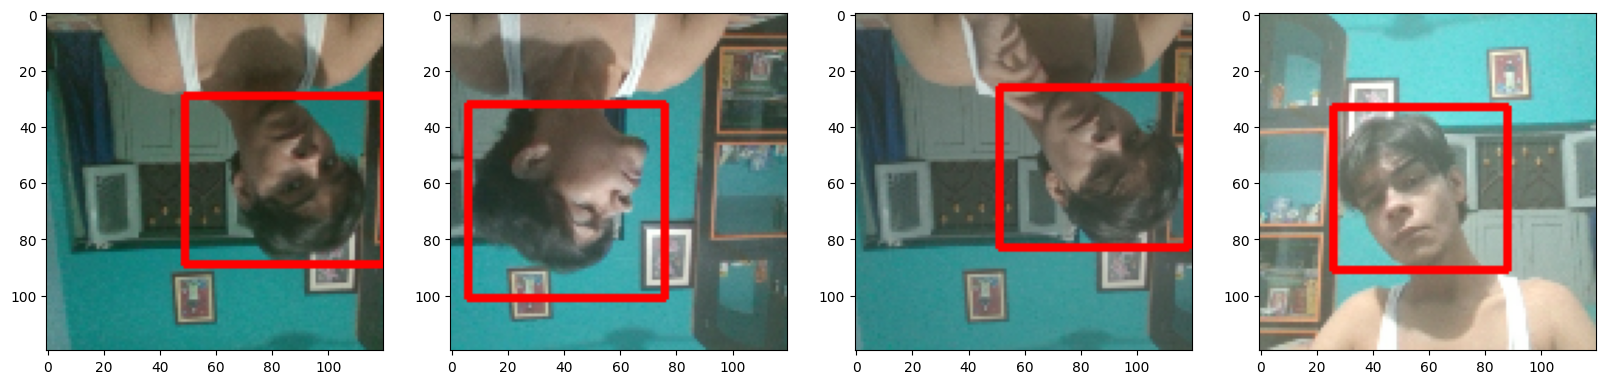

In [93]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [94]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dropout,Flatten,Dense,MaxPooling2D,GlobalMaxPooling2D,Add,ReLU
from tensorflow.keras.applications import VGG16

In [95]:
vgg=VGG16(include_top=False)

In [132]:
from tensorflow.keras.applications import VGG16

def build_model():
    input_layer = Input(shape=(120,120,3))
    vgg = VGG16(include_top=False, input_tensor=input_layer, weights=None)  # or 'imagenet'
    f1 = GlobalMaxPooling2D()(vgg.output)
    
    # Class branch
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Regression branch
    f2 = GlobalMaxPooling2D()(vgg.output)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    return Model(inputs=input_layer, outputs=[class2, regress2])

In [133]:
facetracker=build_model()

In [134]:
facetracker.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 120, 120,  │      1,792 │ input_layer_6[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 120, 120,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 60, 60,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 60, 60,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 60, 60,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 30, 30,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 30, 30,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 30, 30,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 30, 30,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 15, 15,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 15, 15,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 15, 15,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 15, 15,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 7, 7, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 7, 7, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 7, 7, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
x,y=train.as_numpy_iterator().next()
x.shape

(8, 120, 120, 3)

In [136]:
x

array([[[[1.00551471e-01, 5.72610319e-01, 5.66237748e-01],
         [1.21813722e-01, 5.80392182e-01, 5.75245082e-01],
         [1.48468137e-01, 5.91605365e-01, 5.81188738e-01],
         ...,
         [6.13602936e-01, 5.10355413e-01, 3.15870106e-01],
         [6.10906839e-01, 5.11948526e-01, 3.23897064e-01],
         [5.97610295e-01, 5.01041651e-01, 3.35845590e-01]],

        [[1.54718131e-01, 5.62254906e-01, 5.60294092e-01],
         [1.40686274e-01, 5.65625012e-01, 5.62867641e-01],
         [1.27083331e-01, 5.70220590e-01, 5.54534316e-01],
         ...,
         [5.99080861e-01, 5.08823514e-01, 3.34865183e-01],
         [5.76470613e-01, 4.90196079e-01, 2.98468143e-01],
         [5.67279398e-01, 4.92830873e-01, 3.01960796e-01]],

        [[1.40196085e-01, 5.55392146e-01, 5.39705873e-01],
         [1.20465688e-01, 5.56740224e-01, 5.33210814e-01],
         [1.26225486e-01, 5.63357830e-01, 5.39828420e-01],
         ...,
         [5.91053903e-01, 5.00428915e-01, 3.40073526e-01],
         [

In [137]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.        , 0.2582716 , 0.2887654 , 0.8817284 ],
        [0.38506174, 0.1837037 , 0.87765425, 0.6923457 ],
        [0.02802468, 0.26395062, 0.49469134, 0.7182716 ],
        [0.0302469 , 0.21851853, 0.54506177, 0.7037037 ],
        [0.21716048, 0.26864198, 0.6801235 , 0.79703707],
        [0.36654317, 0.2474074 , 0.844321  , 0.7177777 ],
        [0.        , 0.28246912, 0.64851856, 0.72814816],
        [0.21641976, 0.2617284 , 0.68308645, 0.7160494 ]], dtype=float32))

In [138]:
classes,coords=facetracker.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [139]:
classes

array([[0.4999939 ],
       [0.50003445],
       [0.49999574],
       [0.50001   ],
       [0.5000023 ],
       [0.49998084],
       [0.500006  ],
       [0.49998596]], dtype=float32)

In [140]:
coords

array([[0.49962127, 0.50024116, 0.50001943, 0.5002316 ],
       [0.4994982 , 0.50032306, 0.49992427, 0.500317  ],
       [0.49990946, 0.50004756, 0.5       , 0.5000973 ],
       [0.49961653, 0.50025356, 0.5000379 , 0.5002573 ],
       [0.49962527, 0.50025946, 0.50000286, 0.50021803],
       [0.4995777 , 0.5002383 , 0.5000026 , 0.5002533 ],
       [0.49964067, 0.5002533 , 0.50003874, 0.5002222 ],
       [0.49990174, 0.5000659 , 0.49998346, 0.5000808 ]], dtype=float32)

In [141]:
batches_per_epoch=len(train)

In [142]:
batches_per_epoch

79

In [143]:
lr_decay = (1./0.75 -1)/batches_per_epoch

In [144]:
lr_decay

0.004219409282700421

In [145]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

c:\Users\kumar\Desktop\anaco\envs\cnn\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [146]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [147]:
classloss=tf.keras.losses.BinaryCrossentropy()
regressloss=localization_loss

In [148]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.530923366546631>

In [149]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6931449174880981>

In [150]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.530923366546631>

In [151]:
val = val.batch(8)

steps_per_epoch = tf.data.experimental.cardinality(train).numpy()
validation_steps = tf.data.experimental.cardinality(val).numpy()

In [152]:
class FaceTracker(tf.keras.Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs): 
        X, y = batch
        y_class = tf.cast(y[0], tf.float32)
        y_box = tf.cast(y[1], tf.float32)
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            batch_classloss = tf.reduce_mean(self.closs(y_class, classes))
            batch_localizationloss = tf.reduce_mean(self.lloss(y_box, coords))
            total_loss = batch_localizationloss + 0.5 * batch_classloss

        grads = tape.gradient(total_loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.model.trainable_variables))

        return {
            "total_loss": total_loss,
            "class_loss": batch_classloss,
            "regress_loss": batch_localizationloss
        }

    def test_step(self, batch, **kwargs):
        X, y = batch
        classes, coords = self.model(X, training=False)

        batch_classloss = tf.reduce_mean(self.closs(y[0], classes))
        batch_localizationloss = tf.reduce_mean(self.lloss(tf.cast(y[1], tf.float32), coords))
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {
        "total_loss": total_loss,
        "class_loss": batch_classloss,
        "regress_loss": batch_localizationloss
    }


    def call(self, X, **kwargs):
        return self.model(X, **kwargs)


In [126]:
logdir='logs'

In [127]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [154]:
facetracker = build_model()
model = FaceTracker(facetracker)
model.compile(
    opt=tf.keras.optimizers.Adam(1e-4),
    classloss=tf.keras.losses.BinaryCrossentropy(),
    localizationloss=localization_loss
)

hist = model.fit(
    train,
    validation_data=val,
    epochs=10
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - class_loss: 0.0779 - regress_loss: 0.7036 - total_loss: 0.7426

ValueError: Input 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 120, 120, 3), found shape=(None, None, None, 120, 120, None)

In [130]:
for X, y in train.take(1):
    print("Image batch shape:", X.shape)
    print("Class labels shape:", y[0].shape)
    print("BBox labels shape:", y[1].shape)

Image batch shape: (8, 120, 120, 3)
Class labels shape: (8, 1)
BBox labels shape: (8, 4)


In [131]:
for X, y in train.take(1):
    print(type(X), X.shape)
    print(type(y[0]), y[0].shape)
    print(type(y[1]), y[1].shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (8, 120, 120, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'> (8, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'> (8, 4)


In [ ]:
for images, labels in train.take(1):
    print("Image shape:", images.shape)
    print("Label type:", type(labels))
    try:
        print("Label[0] shape:", labels[0].shape)
        print("Label[1] shape:", labels[1].shape)
    except Exception as e:
        print("Cannot index labels:", e)

In [ ]:
model.summary()

In [ ]:
model=build_model()
model.summary()

In [155]:
from tensorflow.keras.models import load_model

In [156]:
facetracker.save('facetracker.h5')

In [158]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
